<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>


<span style='font-family:Georgia'>
    <ol>
        <li><a href='#ProblemStatement'>Problem Statement</a></li>
        <li><a href='#libraries'>Importing Packages and Data</a></li>
        <li><a href='#EDA'>Exploratory Data Analysis</a></li>
        <li><a href='#Outlier'>Outliers Detection</a></li>
        <li><a href='#Feature'>Feature Detection</a></li>  
        <li><a href='#Model'>Model Development</a></li>
        <li><a href='#conclude'>Conclusion</a></li>
        <li><a href='#risk'>Risk Rating</a></li>
    </ol>
</span>
    

![](https://img.freepik.com/free-vector/risk-management-concept-illustration_114360-7037.jpg?size=626&ext=jpg)

<a id="ProblemStatement"></a>
<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<b><h1><span style='color:#85BB65'>|</span> Problem Statement:</h1></b> 

There are several banks, which gives loan to the customers for <b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0">E-Bike purchase.</mark></strong></b>

One such bank is facing profit challenges due to escalating incidences of non-payment in their E-Bike financing division. The firm's objective is to ascertain the loan reimbursement capabilities of their clients and comprehend the relative significance of each factor that contributes to a borrower's propensity to honor the <b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0">loan repayment.</mark></strong></b>

<b>Objective</b>:

The aim of the problem is to foresee whether a client will fail to honor their loan repayment obligation or not. For each identifier in the attached dataset (refer column "ID"), the task is to predict the <b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0">"Non-Payment" risk level</mark></strong></b>. Suggest the optimal <b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0"> Credit Risk Model</mark></strong></b> by using the attached dataset. Feel free to give any proxy indicator/ any analysis which can guide bank to findout potential Loan Defaulter. Define the objective function (Evaluation Metric) for Model based on your own intuition.

<b>Data</b>: 
    
Column ID as an Identifier  
Column "Default" as Y variable  
Rest of the columns as X Variable  
</div>

<a id="libraries"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Importing Packages and Data </span></b> </div>

In [1]:
# Importing required libraries to do operations on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import gc
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_excel('Base_Problem_DataSet.xlsb', engine='pyxlsb')
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


<a id="EDA"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Exploratory Data Analysis </span></b> </div>

In [3]:
df.info() #viewing the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

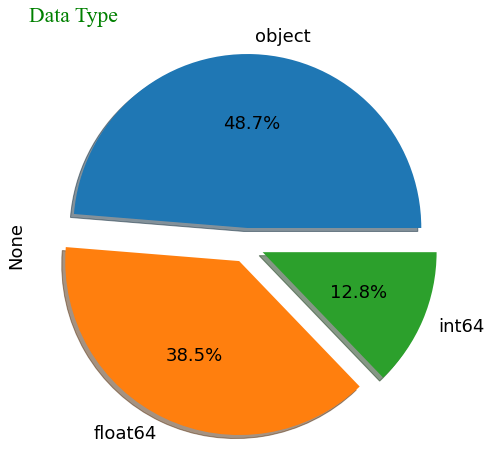

In [4]:
plt.figure(figsize=(15,8))

plt.rcParams.update({'font.size': 18})

df.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.1f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='left',
          font='Times New Roman',
          fontsize='large');

In [5]:
df.shape #checking shape after dropping duplicates from the dataframe

(121856, 39)

In [6]:
df.drop_duplicates(inplace=True) #deleting duplicate rows if exists any
df.shape

(121856, 39)

In [7]:
df.isnull().sum() # checking for null values across all rows if any present

ID                                                0
Patron_Salary                                  3607
Automobile_Possession                          3581
Two-Wheeler_Ownership                          3624
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3632
Borrowing_Periodic_Payment                     4812
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2413
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4857
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age

In [8]:
## Calculating Percentage of Missing Values of Each Column.
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({'Column Name': df.columns,
                                 'Percent Missing': percent_missing})
missing_value_df.sort_values('Percent Missing', inplace=False, ascending=False) ##Sorting

,Column Name,Percent Missing
Private_Dwelling_Duration,Private_Dwelling_Duration,65.729221
Rating_Origin_1,Rating_Origin_1,56.488806
Community_Non-Payment_Incidence,Community_Non-Payment_Incidence,50.820641
Customer_Vocation,Customer_Vocation,34.003250
Rating_Origin_3,Rating_Origin_3,22.092470
Solvency_Information_Agency,Solvency_Information_Agency,15.214680
Identity_Age_in_Days,Identity_Age_in_Days,4.897584
Rating_Origin_2,Rating_Origin_2,4.666163
Population_Fraction_by_Region,Population_Fraction_by_Region,3.985852
Borrowing_Periodic_Payment,Borrowing_Periodic_Payment,3.948923


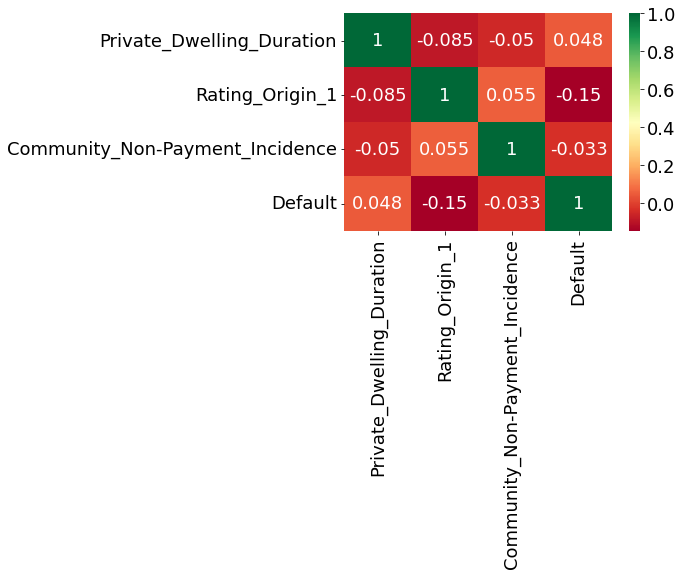

In [9]:
## Checking correlation of columns which has more than 40% null values vs Default column
Source = df[["Private_Dwelling_Duration","Rating_Origin_1","Community_Non-Payment_Incidence","Default"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the above Heatmap, we can see there is almost no correlation between Private_Dwelling_Duration,Rating_Origin_1,Community_Non-Payment_Incidence and Default column, thus we can drop these columns.
    </span>    
</div>

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'><h4>Insights Gained from the above Percentage Code:</h4>

<li>From the above percentage of null values in each columns,the observations made that it is irrelevant to impute data on columns which has more that 40% of null values, even if we impute data in this columns it may produce bias while building Model </li>
<li><b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0">Conclusion:</mark></strong></b>   We drop those column which has more that 40% of null values</li> 
</div> 

In [10]:
df = df.drop(['Private_Dwelling_Duration', 'Rating_Origin_1', 'Community_Non-Payment_Incidence'], axis=1)
df.shape

(121856, 36)

In [11]:
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Rating_Origin_3,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [12]:
## Calculating Percentage of Missing Values of Each Column.

percent_missing = df.isnull().sum() * 100 / len(df)
DataType = df.dtypes
missing_value_df = pd.DataFrame({'Column Name': df.columns,
                                 'Percent Missing': percent_missing,
                                'Data Type': DataType})
missing_value_df.sort_values('Percent Missing', inplace=False, ascending=False) ##Sorting

,Column Name,Percent Missing,Data Type
Customer_Vocation,Customer_Vocation,34.003250,object
Rating_Origin_3,Rating_Origin_3,22.092470,object
Solvency_Information_Agency,Solvency_Information_Agency,15.214680,float64
Identity_Age_in_Days,Identity_Age_in_Days,4.897584,object
Rating_Origin_2,Rating_Origin_2,4.666163,float64
Population_Fraction_by_Region,Population_Fraction_by_Region,3.985852,object
Borrowing_Periodic_Payment,Borrowing_Periodic_Payment,3.948923,object
Customer_Revenue_Category,Customer_Revenue_Category,3.037191,object
Customer_Living_Arrangement,Customer_Living_Arrangement,3.025702,object
Telecommunication_Switch,Telecommunication_Switch,3.006828,float64


**Removing Outliers Before Imputing:**

Pros:
- Imputing missing values after removing outliers can result in more accurate imputations, as the imputed values won't be influenced by extreme values.
- Outliers can skew the distribution and statistical properties of your data, potentially affecting the choice of imputation method.

Cons:
- Removing outliers can result in loss of information, especially if the outliers contain meaningful insights or represent valid data points.
- Outliers might be due to genuine data variations, and removing them before imputing could lead to imputed values that don't accurately represent the data's true distribution.

**Removing Outliers After Imputing:**

Pros:
- Imputing before removing outliers allows you to preserve the maximum amount of data and potentially retain valuable information that the outliers might contain.
- We can apply outlier detection techniques to the imputed data, ensuring that the detection process is based on more accurate values.

Cons:
- Imputed values could be influenced by outliers, leading to imputations that do not accurately represent the underlying data distribution.
- Removing outliers after imputing could still affect the statistical properties of the data, potentially requiring further imputation.

In many cases, the best approach might be a combination of both. Let's explore both the scenarios

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> After analysing it is evident that many outliers detection won't work with many null values in the column, so we impute data then apply outliers techniques. 
    </span>    
</div>

In [13]:
del missing_value_df ## To clear out memory
gc.collect()

# List of columns to convert in float
FloatCol = ['Patron_Salary', 'Rating_Origin_3', 'Identity_Age_in_Days',
            'Population_Fraction_by_Region', 'Borrowing_Periodic_Payment', 'Work_Duration_in_Days',
            'Loan_Capital', 'Enlistment_Period_in_Days', 'Patron_Salary',
            'Elderliness_in_Days']

# Convert object columns to float type
for columnf in FloatCol:
    df[columnf] = pd.to_numeric(df[columnf], errors='coerce').astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121856 entries, 0 to 121855
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118234 non-null  float64
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118219 non-null  float64
 8   Borrowing_Periodic_Payment                  117030 non-null  float64
 9   Customer_Revenue_Category                   118155 non-null  object 
 

#### For categorical data, we consider imputation methods like:

**1. Mode Imputation:** Replace missing values with the most frequent category (mode) in the column.

**2. Constant Imputation:** Replace missing values with a specific constant category that indicates a missing value.

**3. Random Imputation:** Randomly select a category from the existing distribution of values in the column to replace missing values.

In [15]:
df['Patron_Academic_Qualification'].describe()

count        118211
unique            5
top       Secondary
freq          83911
Name: Patron_Academic_Qualification, dtype: object

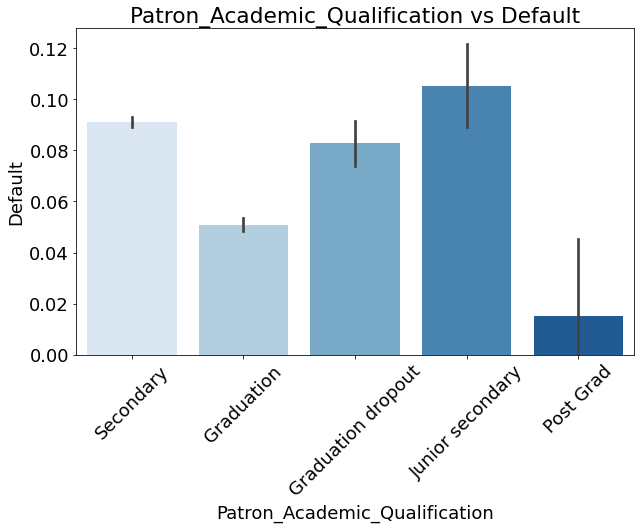

In [16]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Patron_Academic_Qualification', y='Default', palette='Blues', data=df)
plt.title(f'Patron_Academic_Qualification vs Default')
plt.xticks(rotation=45)
plt.show()

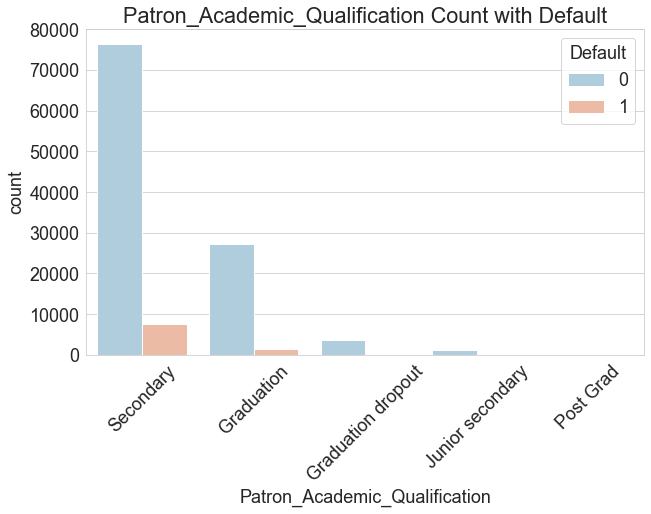

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Patron_Academic_Qualification', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Patron_Academic_Qualification Count with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Patron Academic Qualification having "Secondary" has high "Default" Rate
    </span>    
</div>

In [18]:
df['Customer_Revenue_Category'].describe()

count      118155
unique          8
top       Service
freq        61028
Name: Customer_Revenue_Category, dtype: object

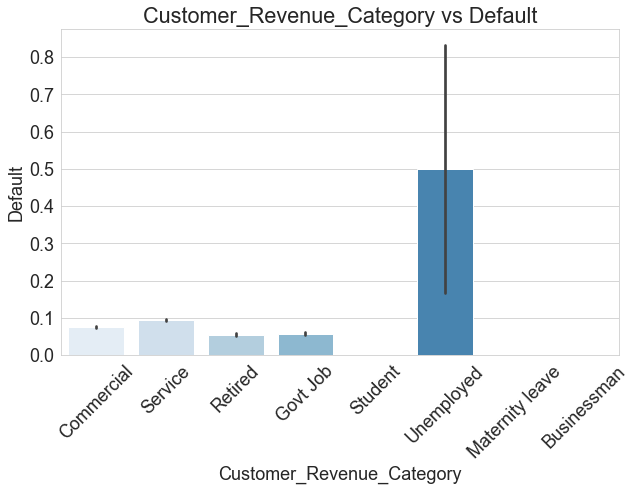

In [19]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Revenue_Category', y='Default', palette='Blues', data=df)
plt.title(f'Customer_Revenue_Category vs Default')
plt.xticks(rotation=45)
plt.show()

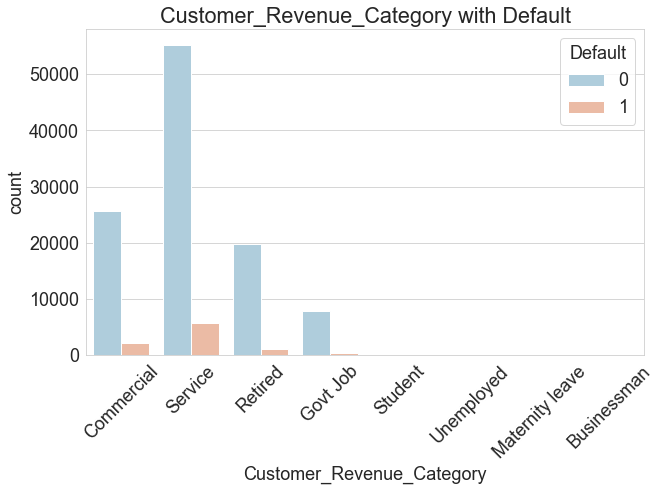

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Customer_Revenue_Category', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Customer_Revenue_Category with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Customer_Revenue_Category having "Service" has high "Default" Rate
    </span>    
</div>

In [21]:
df['Customer_Conjugal_State'].describe()

count     118383
unique         4
top            M
freq       87349
Name: Customer_Conjugal_State, dtype: object

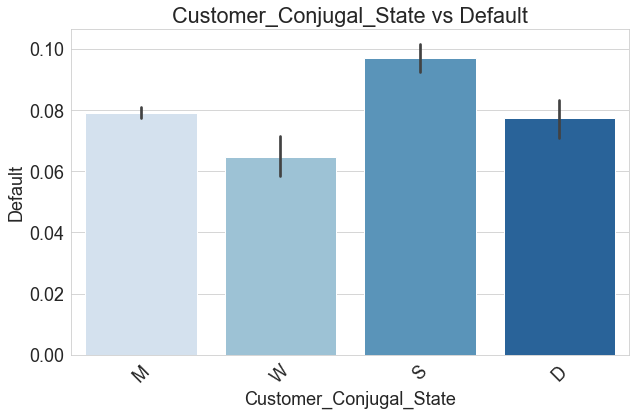

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Conjugal_State', y='Default', palette='Blues', data=df)
plt.title(f'Customer_Conjugal_State vs Default')
plt.xticks(rotation=45)
plt.show()

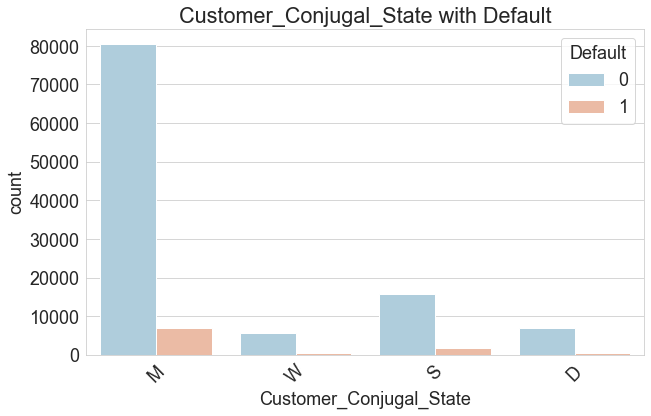

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Customer_Conjugal_State', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Customer_Conjugal_State with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Customer_Conjugal_State having "M" has high "Default" Rate
    </span>    
</div>

In [24]:
df['Patron_Sex'].describe()

count     119443
unique         3
top         Male
freq       78463
Name: Patron_Sex, dtype: object

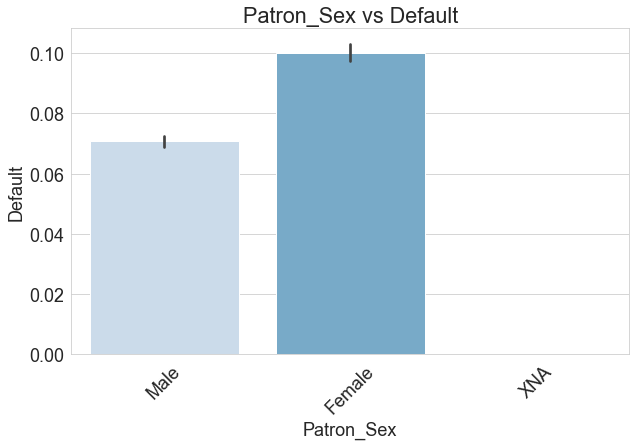

In [25]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Patron_Sex', y='Default', palette='Blues', data=df)
plt.title(f'Patron_Sex vs Default')
plt.xticks(rotation=45)
plt.show()

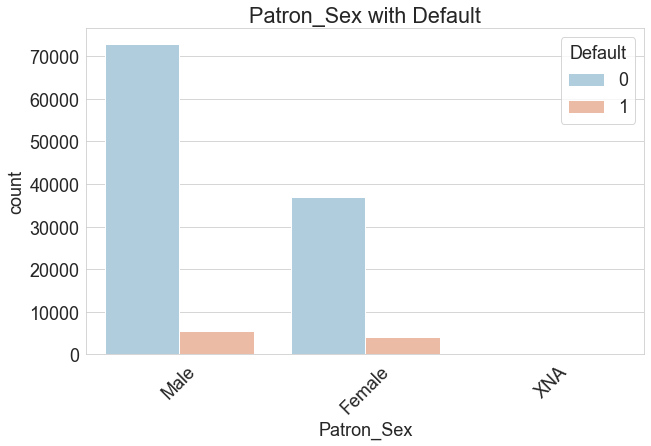

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Patron_Sex', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Patron_Sex with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Patron_Sex having "Male" has high "Default" Rate than "Female" and "XNA"
    </span>    
</div>

In [27]:
df['Borrowing_Agreement_Category'].describe()

count     118205
unique         2
top           CL
freq      107118
Name: Borrowing_Agreement_Category, dtype: object

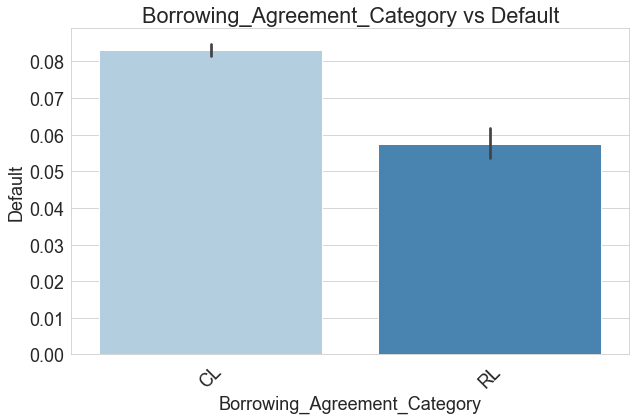

In [28]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Borrowing_Agreement_Category', y='Default', palette='Blues', data=df)
plt.title(f'Borrowing_Agreement_Category vs Default')
plt.xticks(rotation=45)
plt.show()

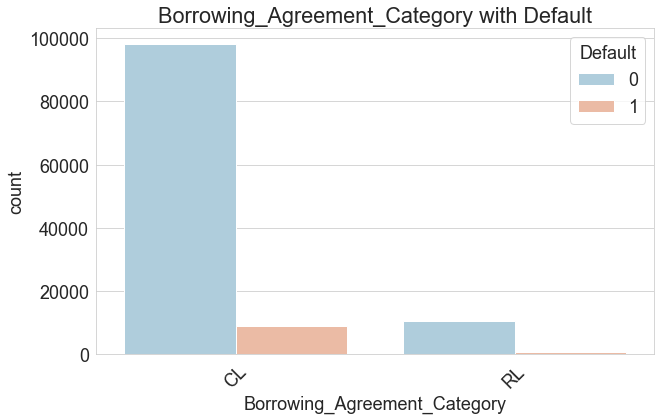

In [29]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Borrowing_Agreement_Category', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Borrowing_Agreement_Category with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Borrowing_Agreement_Category having "CL" has high "Default" Rate.
    </span>    
</div>

In [30]:
df['Customer_Living_Arrangement'].describe()

count     118169
unique         6
top         Home
freq      104870
Name: Customer_Living_Arrangement, dtype: object

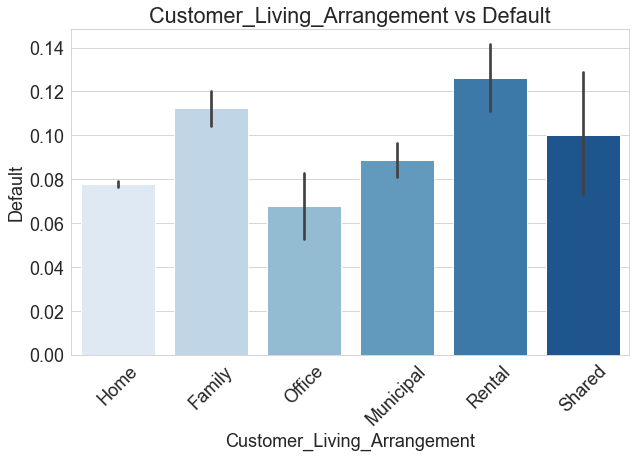

In [31]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Living_Arrangement', y='Default', palette='Blues', data=df)
plt.title(f'Customer_Living_Arrangement vs Default')
plt.xticks(rotation=45)
plt.show()

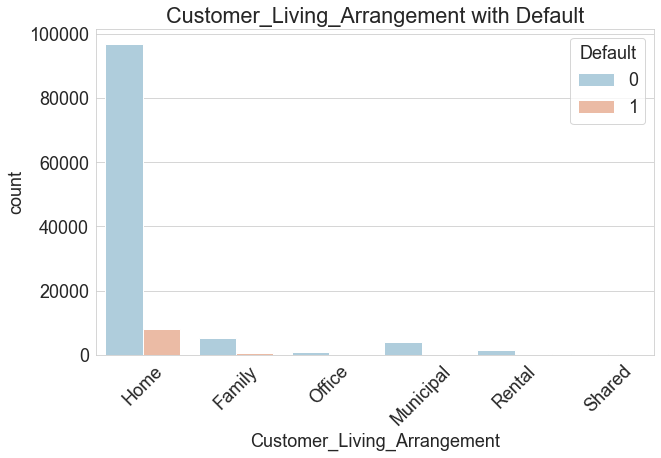

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Customer_Living_Arrangement', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Customer_Living_Arrangement with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Customer_Living_Arrangement having "Home" has high "Default" Rate.
    </span>    
</div>

In [33]:
df['Customer_Vocation'].describe()

count        80421
unique          18
top       Laborers
freq         21024
Name: Customer_Vocation, dtype: object

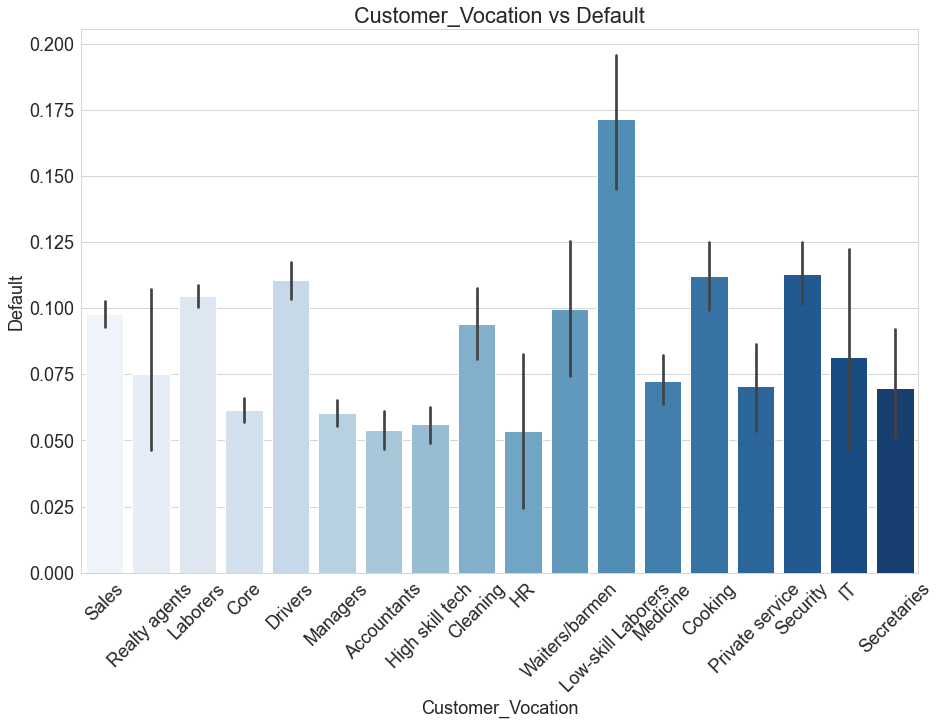

In [34]:
# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Customer_Vocation', y='Default', palette='Blues', data=df)
plt.title(f'Customer_Vocation vs Default')
plt.xticks(rotation=45)
plt.show()

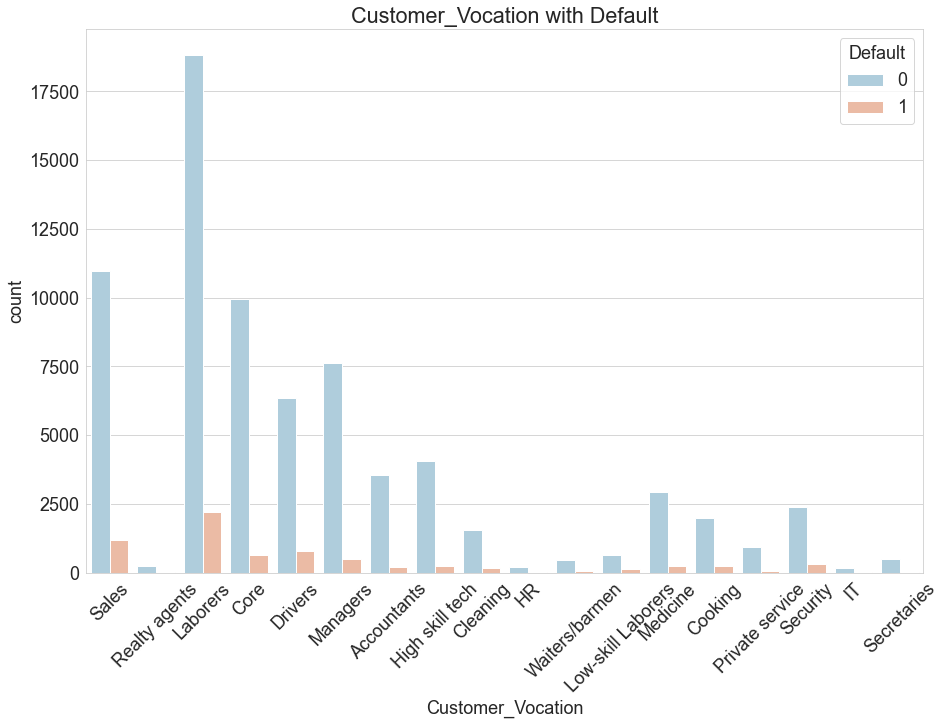

In [35]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(x='Customer_Vocation', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Customer_Vocation with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Customer_Vocation having "Laborers" has high "Default" Rate.
    </span>    
</div>

In [36]:
df['Patron_Constant_Correspondence_Marker'].describe()

count     121856
unique         2
top          Yes
freq      112454
Name: Patron_Constant_Correspondence_Marker, dtype: object

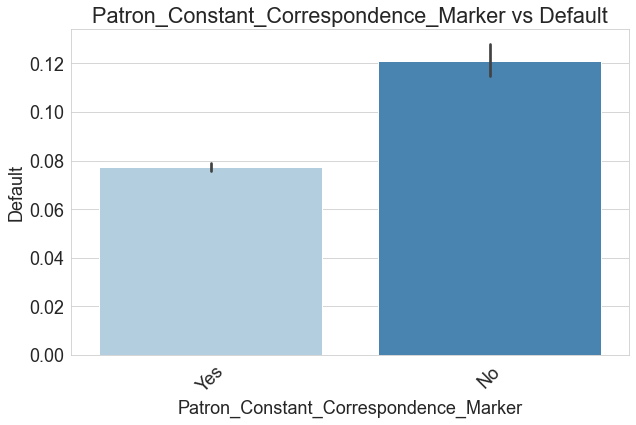

In [37]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Patron_Constant_Correspondence_Marker', y='Default', palette='Blues', data=df)
plt.title(f'Patron_Constant_Correspondence_Marker vs Default')
plt.xticks(rotation=45)
plt.show()

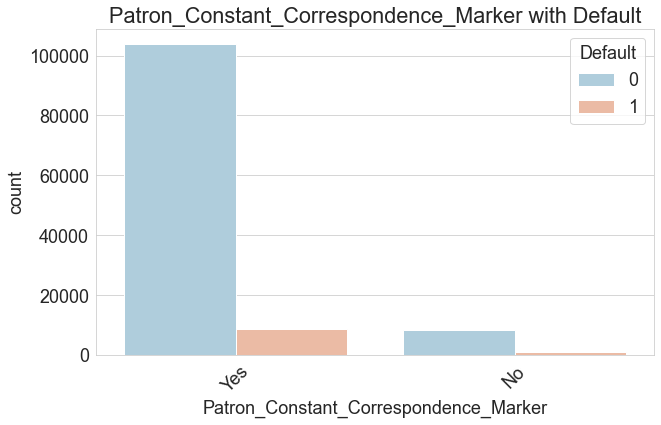

In [38]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Patron_Constant_Correspondence_Marker', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Patron_Constant_Correspondence_Marker with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Patron_Constant_Correspondence_Marker having "Yes" has high "Default" Rate.
    </span>    
</div>

In [39]:
df['Customer_Professional_Communication_Marker'].describe()

count     121856
unique         2
top          Yes
freq      100015
Name: Customer_Professional_Communication_Marker, dtype: object

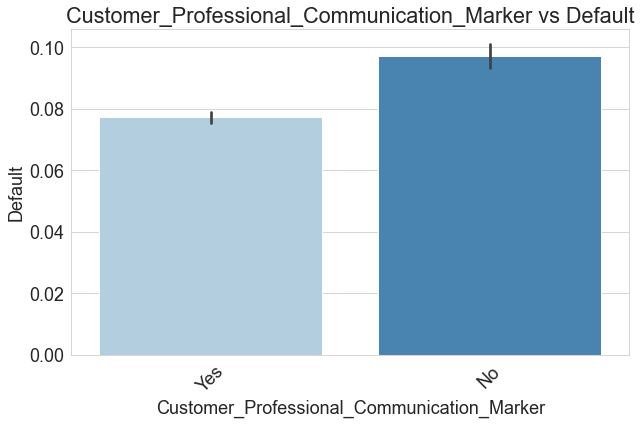

In [40]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Professional_Communication_Marker', y='Default', palette='Blues', data=df)
plt.title(f'Customer_Professional_Communication_Marker vs Default')
plt.xticks(rotation=45)
plt.show()

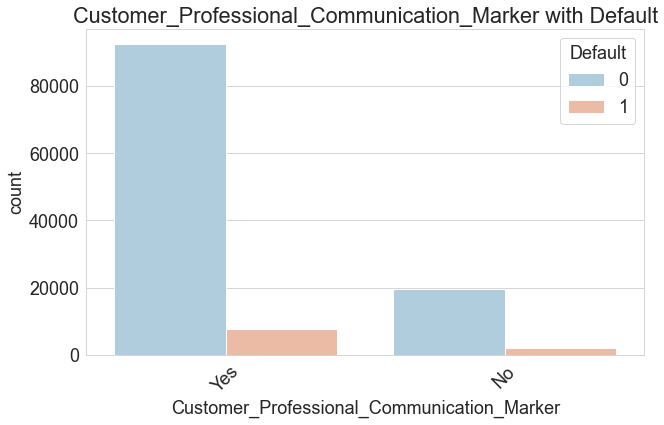

In [41]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='Customer_Professional_Communication_Marker', hue='Default', palette='RdBu_r', data=df)
plt.title(f'Customer_Professional_Communication_Marker with Default')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Customer_Professional_Communication_Marker having "Yes" has high "Default" Rate.
    </span>    
</div>

In [42]:
df['Sort_of_Institution'].describe()

count                     118247
unique                        58
top       Business Entity Type 3
freq                       26279
Name: Sort_of_Institution, dtype: object

In [43]:
# # Create a bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Sort_of_Institution', y='Default', palette='Blues', data=df)
# plt.title(f'Sort_of_Institution vs Default')
# plt.xticks(rotation=45)
# plt.show()

In [44]:
# plt.figure(figsize=(10, 6))
# sns.set_style('whitegrid')
# sns.countplot(x='Sort_of_Institution', hue='Default', palette='RdBu_r', data=df)
# plt.title(f'Sort_of_Institution with Default')
# plt.xticks(rotation=45)
# plt.show()

In [45]:
# Imputing with Mode because it show the most robustness and high key metrics
# Identify object columns
object_columns = df.select_dtypes(include='object').columns

# Impute missing values in object columns with their mode
for column in object_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [46]:
# Specify the columns to label encode and one-hot encode
columns_to_label_encode = df.select_dtypes(include='object').columns

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to specific columns
for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [47]:
# Split the dataset into features and target variable
X = df.drop(columns=['Default', 'ID'])
y = df['Default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of imputation methods to compare
imputation_methods = ['mean', 'median', 'most_frequent', 'constant']

# Dictionary to store results
results = {}

# Loop through each imputation method
for method in imputation_methods:
    # Create an imputer with the selected method
    imputer = SimpleImputer(strategy=method)
    
    # Impute missing values on the training set
    X_train_imputed = imputer.fit_transform(X_train)
    
    # Impute missing values on the testing set
    X_test_imputed = imputer.transform(X_test)
    
    # Create and train a classification model
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_imputed, y_train)
    
    # Make predictions on the testing set
    y_pred = classifier.predict(X_test_imputed)
    
    # Evaluate the model using accuracy and store the result
    accuracy = accuracy_score(y_test, y_pred)
    results[method] = accuracy

# Print the results
print(results)


{'mean': 0.9303709174462498, 'median': 0.9303709174462498, 'most_frequent': 0.9299606105366814, 'constant': 0.9285245363531922}


**Let's Try with KNN and Regression Imputer for 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see Median and Mean is giving almost same accuracy, we can go with any one of this metric   
 <br>Also, Tried with both Regression and KNN Imputations method but it very computational costly.
    </span>    
</div>

In [48]:
del results
gc.collect()

26103

In [49]:
# Identify float and int columns
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Impute missing values with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [50]:
del numeric_columns
gc.collect()

20

<a id="Outlier"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Outliers Detection</span></b> </div>

The Z-Score, also known as the standard score, is a statistical measurement that indicates how many standard deviations a data point is away from the mean of the data set. It's a normalized value that helps to understand how a particular data point compares to the rest of the data in terms of its distance from the mean.

The formula to calculate the Z-Score of a data point is:

Z = (X - μ) / σ

Where:

Z is the Z-Score.
X is the individual data point.
μ is the mean of the data set.
σ is the standard deviation of the data set.
The Z-Score can be positive or negative, indicating whether the data point is above or below the mean, respectively. A Z-Score of 0 indicates that the data point is equal to the mean

In [51]:
# Function to identify columns with outliers using z-score
df1 = df.drop(columns=['Default', 'ID'])

def identify_columns_with_outliers_zscore(df1, threshold=3):
    z_scores = np.abs((df1 - df1.mean()) / df1.std())
    outliers_mask = z_scores > threshold
    columns_with_outliers = df1.columns[outliers_mask.any()]
    return columns_with_outliers

# Identify columns with outliers using z-score
columns_with_outliers = identify_columns_with_outliers_zscore(df1)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: Index(['Patron_Salary', 'Offspring_Number', 'Loan_Capital',
       'Borrowing_Periodic_Payment', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Enlistment_Period_in_Days', 'Cellphone_Marker', 'Patron_Kin_Count',
       'Request_Submission_Hour', 'Patron_Constant_Correspondence_Marker',
       'Rating_Origin_2', 'Rating_Origin_3', 'Telecommunication_Switch',
       'Solvency_Information_Agency'],
      dtype='object')


In [52]:
# Calculate the percentage of outliers for each column using Z-Score
def calculate_outlier_percentage_zscore(column):
    # Convert non-numeric values to NaN
    column_numeric = pd.to_numeric(column, errors='coerce')
    
    # Calculate Z-Scores and outliers
    z_scores = np.abs(stats.zscore(column_numeric))
    outliers = z_scores > 3  # Adjust the threshold as needed
    
    # Calculate outlier percentage excluding NaN values
    total_valid_data = len(column_numeric.dropna())
    outlier_count = np.sum(outliers[~column_numeric.isna()])
    outlier_percentage = (outlier_count / total_valid_data) * 100
    return outlier_percentage

# Calculate and print the percentage of outliers for each column
for column in df1.columns:
    outlier_percentage = calculate_outlier_percentage_zscore(df[column])
    print(f"{column}: {outlier_percentage:.2f}% outliers")


Patron_Salary: 0.86% outliers
Automobile_Possession: 0.00% outliers
Two-Wheeler_Ownership: 0.00% outliers
Ongoing_Borrowing: 0.00% outliers
Residence_Proprietorship: 0.00% outliers
Offspring_Number: 1.36% outliers
Loan_Capital: 1.35% outliers
Borrowing_Periodic_Payment: 0.95% outliers
Customer_Revenue_Category: 0.00% outliers
Patron_Academic_Qualification: 0.00% outliers
Customer_Conjugal_State: 0.00% outliers
Patron_Sex: 0.00% outliers
Borrowing_Agreement_Category: 9.10% outliers
Customer_Living_Arrangement: 2.68% outliers
Population_Fraction_by_Region: 0.00% outliers
Elderliness_in_Days: 0.00% outliers
Work_Duration_in_Days: 0.00% outliers
Enlistment_Period_in_Days: 0.28% outliers
Identity_Age_in_Days: 0.00% outliers
Cellphone_Marker: 0.00% outliers
Residential_Phone_Marker: 0.00% outliers
Employment_Phone_Operation: 0.00% outliers
Customer_Vocation: 0.00% outliers
Patron_Kin_Count: 1.28% outliers
Customer_Urban_Area_Ranking: 0.00% outliers
Request_Submission_Day: 0.00% outliers
Requ

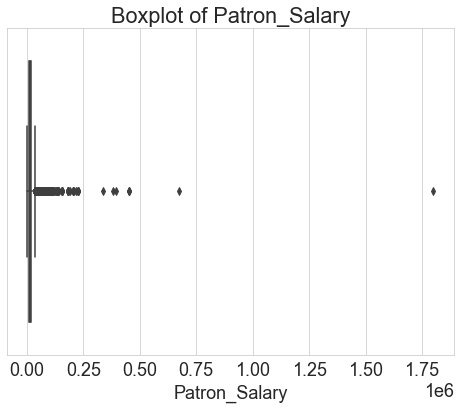

Number of outliers: 5392


In [53]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Patron_Salary'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

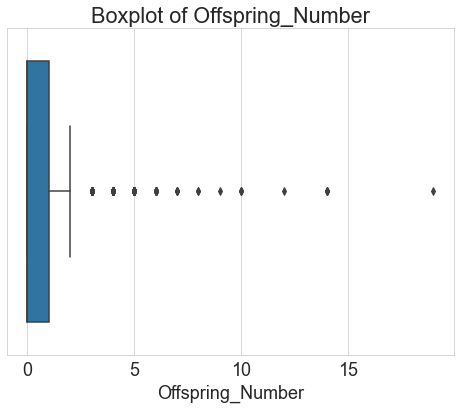

Number of outliers: 1659


In [54]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Offspring_Number'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

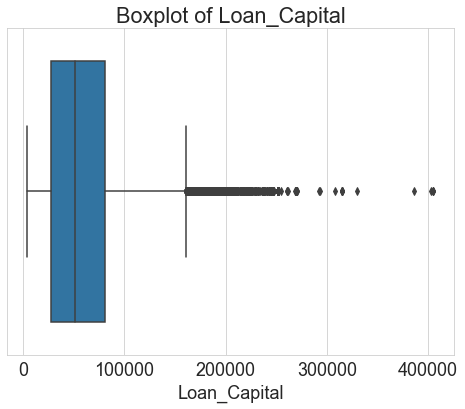

Number of outliers: 2599


In [55]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Loan_Capital'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

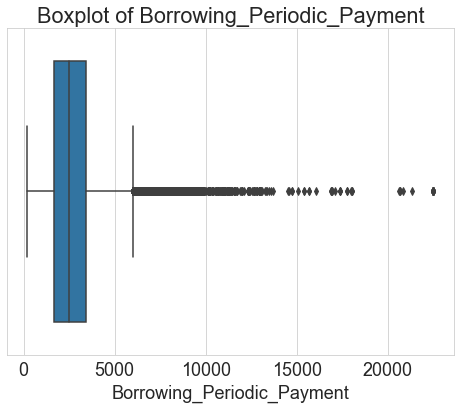

Number of outliers: 3220


In [56]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Borrowing_Periodic_Payment'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

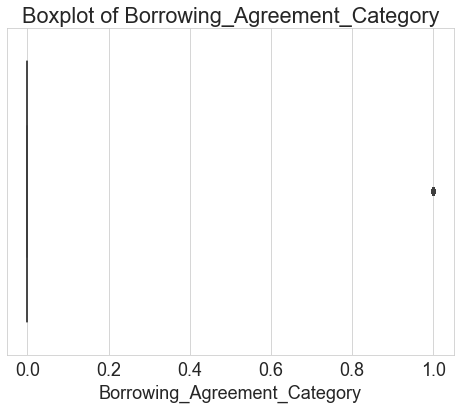

Number of outliers: 11087


In [57]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Borrowing_Agreement_Category'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

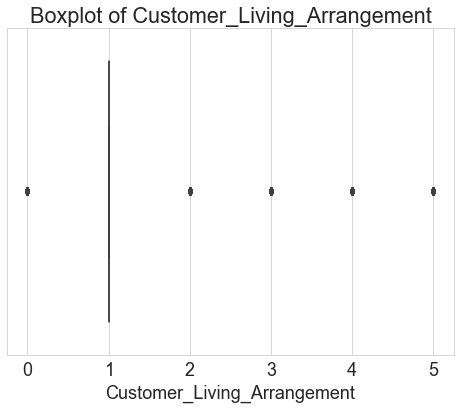

Number of outliers: 13299


In [58]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Customer_Living_Arrangement'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

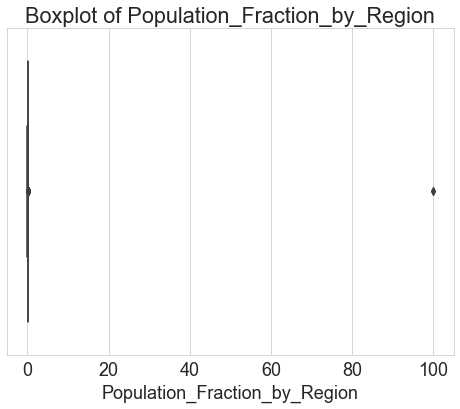

Number of outliers: 3305


In [59]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Population_Fraction_by_Region'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

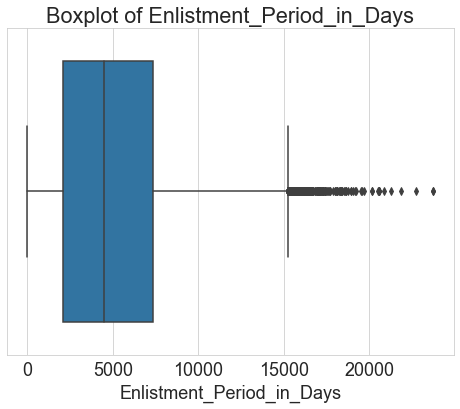

Number of outliers: 380


In [60]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Enlistment_Period_in_Days'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

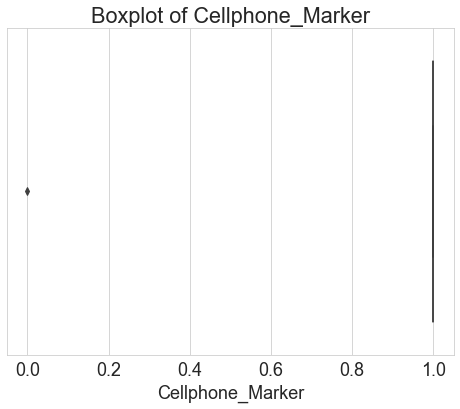

Number of outliers: 1


In [61]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Cellphone_Marker'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

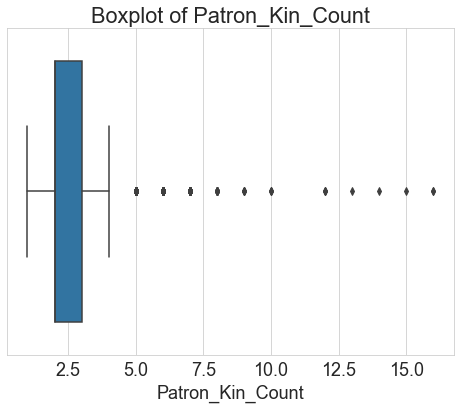

Number of outliers: 1564


In [62]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Patron_Kin_Count'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

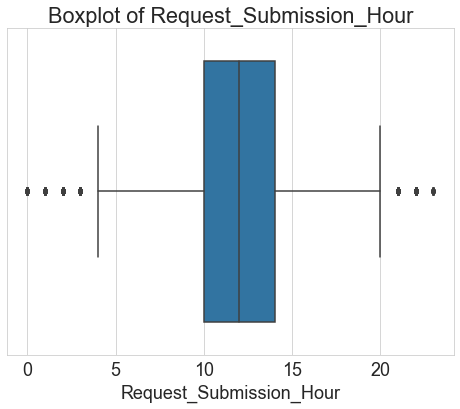

Number of outliers: 917


In [63]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Request_Submission_Hour'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

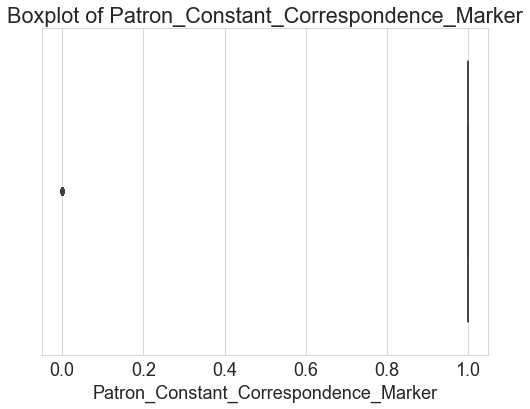

Number of outliers: 9402


In [64]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Patron_Constant_Correspondence_Marker'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

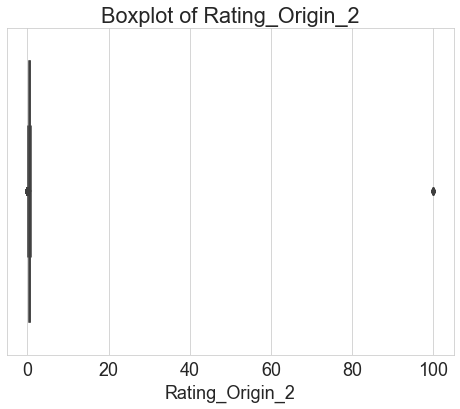

Number of outliers: 624


In [65]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Rating_Origin_2'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

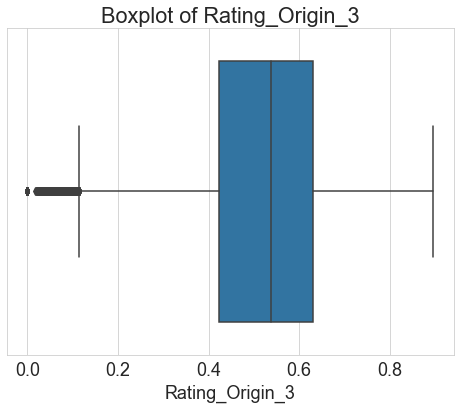

Number of outliers: 2570


In [66]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Rating_Origin_3'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

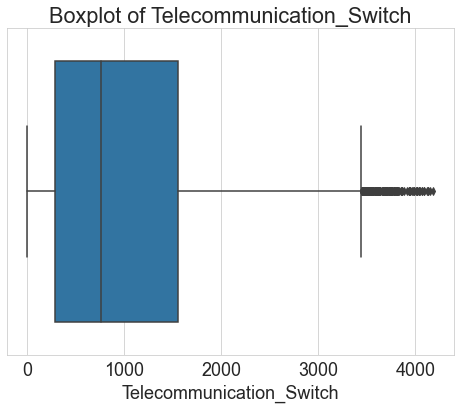

Number of outliers: 260


In [67]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Telecommunication_Switch'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

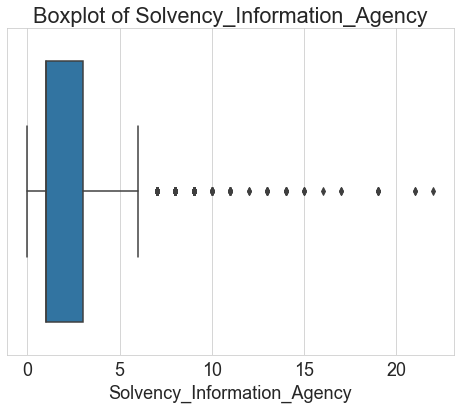

Number of outliers: 2724


In [68]:
# Specify the column containing the data for which you want to create a box plot
column_name = 'Solvency_Information_Agency'

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

<a id="Feature"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Features Selection</span></b> </div>

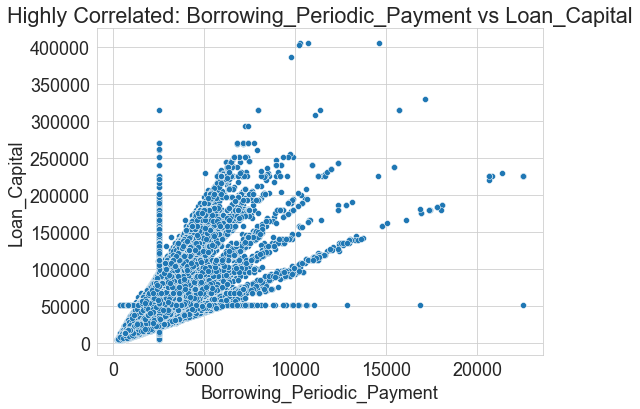

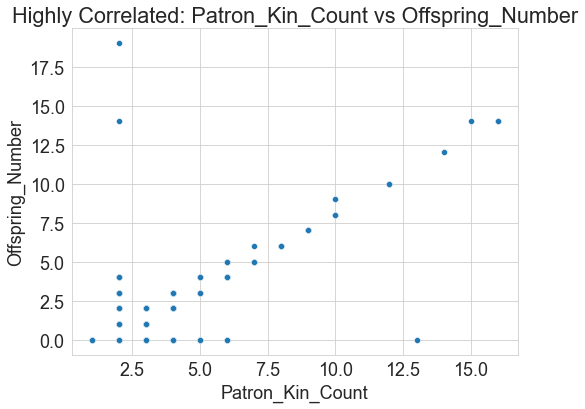

In [69]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a correlation threshold
correlation_threshold = 0.7  # Adjust the threshold as needed

# Find pairs of highly correlated features
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Plot the highly correlated feature pairs
for feature1, feature2 in highly_correlated_pairs:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.scatterplot(x=feature1, y=feature2, data=df)
    plt.title(f'Highly Correlated: {feature1} vs {feature2}')
    plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see that two pairs (Borrowing_Periodic_Payment - Loan_Capital) and (Patron_Kin_Count - Offspring_Number) are highly correlated 
 <br>So, we can take one column each from pair and can drop one column from dataframe.
    </span>    
</div>

In [70]:
df = df.drop(columns=['Borrowing_Periodic_Payment', 'Patron_Kin_Count'], axis=1) 

In [71]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Default', 'ID'])
y = df['Default']

# Initialize models
lasso_model = Lasso(alpha=1.0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit models
lasso_model.fit(X, y)
rf_model.fit(X, y)
xgb_model.fit(X, y)

# Calculate feature importances
lasso_importances = abs(lasso_model.coef_)
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame to store importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso_Importance': lasso_importances,
    'RF_Importance': rf_importances,
    'XGB_Importance': xgb_importances
})

# Rank features by importance
feature_importance_df['Lasso_Rank'] = feature_importance_df['Lasso_Importance'].rank(ascending=False)
feature_importance_df['RF_Rank'] = feature_importance_df['RF_Importance'].rank(ascending=False)
feature_importance_df['XGB_Rank'] = feature_importance_df['XGB_Importance'].rank(ascending=False)

# Sort by any of the ranking columns (e.g., Lasso_Rank)
sorted_df = feature_importance_df.sort_values(by='Lasso_Rank')

# Print the sorted DataFrame
print(sorted_df)


[18:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                                       Feature  Lasso_Importance  \
30                    Telecommunication_Switch      1.323378e-05   
17                        Identity_Age_in_Days      5.609916e-06   
14                         Elderliness_in_Days      3.369269e-06   
16                   Enlistment_Period_in_Days      1.172183e-06   
0                                Patron_Salary      4.298972e-07   
6                                 Loan_Capital      1.334651e-07   
15                       Work_Duration_in_Days      9.550855e-09   
7                    Customer_Revenue_Category      0.000000e+00   
29                             Rating_Origin_3      0.000000e+00   
28        

In [72]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Default', 'ID'])
y = df['Default']

# Initialize your chosen model (e.g., LogisticRegression)
model = RandomForestClassifier()

# Initialize RFE with the chosen model
n_features_to_select = 20  # Number of features to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)


Selected Features: Index(['Patron_Salary', 'Ongoing_Borrowing', 'Offspring_Number',
       'Loan_Capital', 'Customer_Revenue_Category', 'Customer_Conjugal_State',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days',
       'Customer_Vocation', 'Request_Submission_Day',
       'Request_Submission_Hour', 'Sort_of_Institution', 'Rating_Origin_2',
       'Rating_Origin_3', 'Telecommunication_Switch',
       'Solvency_Information_Agency'],
      dtype='object')


In [73]:
### getting all the selected feature in X and y dataframe for further model development

X = df[['Patron_Salary', 'Ongoing_Borrowing', 'Offspring_Number',
       'Loan_Capital', 'Customer_Revenue_Category', 'Customer_Conjugal_State',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days',
       'Customer_Vocation', 'Request_Submission_Day',
       'Request_Submission_Hour', 'Sort_of_Institution', 'Rating_Origin_2',
       'Rating_Origin_3', 'Telecommunication_Switch',
       'Solvency_Information_Agency']].copy()
y = df['Default']

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see after applying Recursive Feature Elimination (RFE) we get these top 15 features, but having domain knowledge here helps more, than using techniques like RFE
    </span>    
</div>

<a id="Model"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Model Development</span></b> </div>

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(),
    XGBClassifier()
    # Enable probability for ROC AUC calculation
]

# Define a dictionary to store metric results
metrics_results = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

# Loop through classifiers and metrics, train, and evaluate
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    print(f'{classifier_name}:')
    
    # Train the classifier
    classifier.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test_scaled)
    
    # Calculate and print metrics
    for metric_name, metric_function in metrics_results.items():
        metric_value = metric_function(y_test, y_pred)
        print(f'{metric_name}: {metric_value:.2f}')
    
    print()  # Print a blank line between classifiers


LogisticRegression:
Accuracy: 0.92
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.50

DecisionTreeClassifier:
Accuracy: 0.87
Precision: 0.24
Recall: 0.28
F1 Score: 0.26
ROC AUC: 0.60

RandomForestClassifier:
Accuracy: 0.93
Precision: 1.00
Recall: 0.14
F1 Score: 0.24
ROC AUC: 0.57

AdaBoostClassifier:
Accuracy: 0.92
Precision: 0.46
Recall: 0.01
F1 Score: 0.03
ROC AUC: 0.51

MLPClassifier:
Accuracy: 0.92
Precision: 0.41
Recall: 0.03
F1 Score: 0.05
ROC AUC: 0.51

GradientBoostingClassifier:
Accuracy: 0.92
Precision: 0.62
Recall: 0.01
F1 Score: 0.01
ROC AUC: 0.50

LGBMClassifier:
Accuracy: 0.92
Precision: 0.47
Recall: 0.00
F1 Score: 0.01
ROC AUC: 0.50

XGBClassifier:
[18:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 

In [77]:
# ### Initialize model which needs to be tuned

# dtr_classifier = DecisionTreeClassifier(random_state=42)

# # Define the parameter grid for tuning

# # RandomForestClassifier parameter

# # param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [None, 10, 20],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4]
# # }

# # DecisionTreeClassifier parameter

# # param_grid = {
# #     'criterion': ['gini', 'entropy'],
# #     'max_depth': [None, 10, 20],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4]
# # }

# # GradientBoostingClassifier parameter

# param_grid = {
#     'n_estimators':[5,50,250,500],
#     'max_depth':[1,3,5,7,9],
#     'learning_rate':[0.01,0.1,1,10,100]
# }



# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=dtr_classifier, param_grid=param_grid, 
#                            cv=3, scoring='accuracy', verbose=2)

# # Perform parameter tuning
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Predict using the best model
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# print("Best Parameters:", best_params)
# print("Accuracy:", accuracy)
# print("Recall:", recall)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.9s
[CV] END criterion=gini, m

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   1.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9183078943049401
Recall: 0.032357473035439135


In [ ]:
#RandomForest Classifier
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Accuracy: 0.9306991629739044

#DecisionTree Classifier
# Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
# Accuracy: 0.9173641884129329

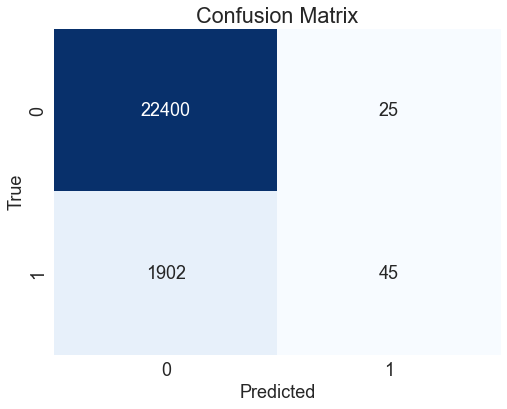

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.64      0.02      0.04      1947

    accuracy                           0.92     24372
   macro avg       0.78      0.51      0.50     24372
weighted avg       0.90      0.92      0.89     24372



In [79]:
### Build Ensemble Model

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt_classfier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, random_state=42)

# Initialize the VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_classifier),
    ('GradientBoosting', gb_classifier),
    ('DecisionTree', dt_classfier)
], voting='soft')  # Use 'soft' voting to consider class probabilities

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict using the ensemble model
y_pred = ensemble_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Ensemble Model Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


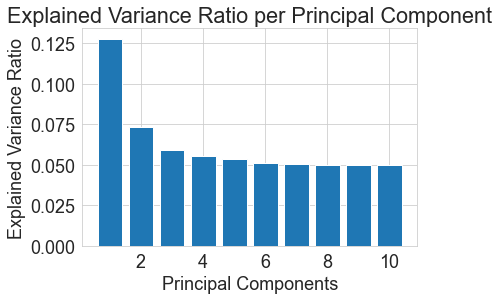

Top Principal Component Loadings:
PC1: [ 0.14163179 -0.00052456  0.25998381  0.06086437 -0.09449556 -0.13866156
 -0.00943035  0.0013591  -0.49740258 -0.52328345 -0.27179829 -0.25139561
 -0.02809481 -0.007636    0.09957566 -0.4259529  -0.00243061 -0.1587005
 -0.03835044 -0.05680326]
PC2: [ 0.54568846  0.01253058 -0.0873575   0.57741821 -0.32295348 -0.12260635
  0.03518057  0.01396588  0.18095955 -0.01163324  0.1261021   0.13384372
 -0.10537763 -0.01123777  0.19301781 -0.05761892  0.16607813  0.1054714
  0.27931594  0.07093871]
PC3: [ 0.12739467 -0.02127097 -0.48135461  0.04318339 -0.22580549  0.42057428
 -0.05205434  0.02513792  0.00687603  0.02347196  0.11719442 -0.39191209
  0.00326149 -0.05105752  0.24542365 -0.0096926  -0.04928473 -0.19317088
 -0.43713508 -0.2384021 ]
PC4: [ 8.88237734e-02  5.73184660e-02 -1.73058148e-01 -1.30461362e-01
  1.93791939e-02  1.24189504e-01 -5.32300043e-02 -1.66561440e-02
 -3.07888870e-04 -9.84846133e-03  1.22156233e-02 -1.07268177e-01
  1.53333145e-01  

In [80]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want to keep
n_components = 10  # Number of principal components to keep
pca = PCA(n_components=n_components)

# Perform PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, n_components+1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

# Print the top principal component loadings
print("Top Principal Component Loadings:")
for i in range(n_components):
    print(f'PC{i+1}:', pca.components_[i])


In [81]:
# Initialize PCA with the number of components you want to keep
n_components = 15  # Number of principal components to keep
pca = PCA(n_components=n_components)

# Perform PCA and transform the data
X_pca = pca.fit_transform(X_scaled)

In [82]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 0.920605612998523


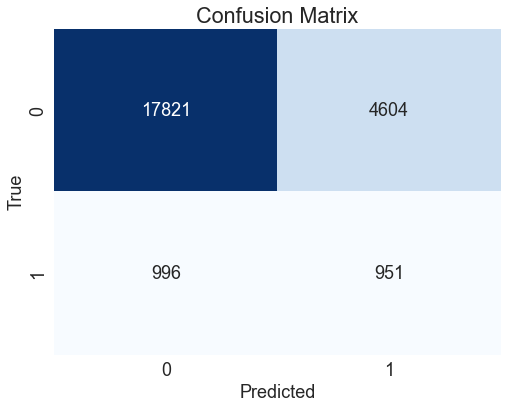

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     22425
           1       0.17      0.49      0.25      1947

    accuracy                           0.77     24372
   macro avg       0.56      0.64      0.56     24372
weighted avg       0.89      0.77      0.82     24372



In [83]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the model on the resampled data
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Predict using the model
y_pred = ensemble_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> As we can see after applying PCA and SMOTE we are getting maximum recall
    </span>    
</div>

<a id="conclude"></a>
<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<b><h1><span style='color:#85BB65'>|</span>Conclusion:</h1></b> 

<b>Insights Gained from the above Analysis Code</b>:

<li>In banking specially in identifying loan/risk default the Recall should be always maximum.</li>
<li><b><strong><mark style="background-color:#FFF722;color:black;border-radius:4px;opacity:1.0">Reason:</mark></strong></b>Credit risk model prediction is a high-stakes task, as it involves significant financial implications. The lending institution wants to focus on identifying loans that are at a higher risk of defaulting. Maximizing recall helps capture these high-risk cases, allowing the institution to take appropriate actions such as additional scrutiny or targeted interventions.</li>
    
</div>

<a id="risk"></a>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:5px;overflow:hidden;background-image: url(https://img.freepik.com/premium-vector/clean-green-background-with-white-geomatric-pattern_687972-7.jpg?size=626&ext=jpg&ga=GA1.2.1463094170.1691574658&semt=ais)"><b><span style='color:black'>Risk Rating output</span></b> </div>

In [88]:
# Predict probabilities for the entire test data
proba_predictions = ensemble_model.predict_proba(X_test)


# Create a DataFrame with the first 5 prediction probabilities
first_5_probas_df = pd.DataFrame(proba_predictions[:5], columns=ensemble_model.classes_)

print("Probability Predictions for First 5 Predictions:")
print(first_5_probas_df)

Probability Predictions for First 5 Predictions:
          0         1
0  0.374448  0.625552
1  0.510002  0.489998
2  0.253014  0.746986
3  0.650413  0.349587
4  0.741569  0.258431


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> In this manner we can provide customer Risk Rating/Credit Risk Model of the patron and minimize the loss of the company.
    </span>    
</div>